In [66]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random 

In [67]:
data = pd.read_csv('iris.csv', header=(0))

data = data.to_numpy()

X = data[:,0:-1]
y = data[:,-1]

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [69]:
from sklearn.model_selection import train_test_split

p = 0.8
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = p, random_state = 42)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k=5

model = KNeighborsClassifier(n_neighbors=k, metric ='euclidean')

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

score = accuracy_score(y_pred,y_test)
print("Acuracia: ",score)


Acuracia:  0.9333333333333333


In [71]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver ='lbfgs', max_iter=1000)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

score = accuracy_score(y_pred,y_test)
print("ACurácia: ",score)

ACurácia:  0.9333333333333333


In [72]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

score = accuracy_score(y_pred,y_test)
print("Acurácia: ",score)

Acurácia:  0.95


In [73]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


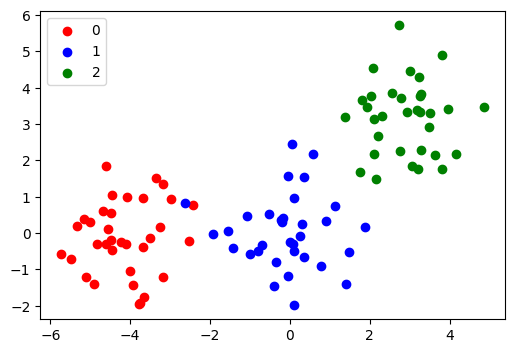

TypeError: ignored

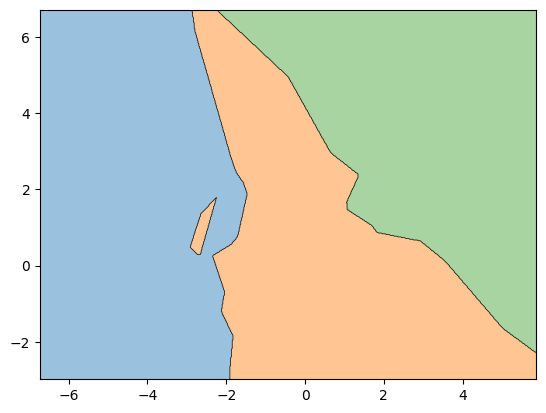

In [74]:
from mlxtend.plotting import plot_decision_regions
import sklearn.datasets as skdata

plt.figure(figsize=(6,4))
n_samples = 100

centers = [(-4,0), (0,0),(3,3)]

X,y = skdata.make_blobs(n_samples = 100, n_features=2, cluster_std=1.0, 
                        centers=centers, shuffle = False, random_state = 42)

d = np.column_stack((X,np.transpose(y)))
data = pd.DataFrame(data = d, columns = ['X1','X2','y'])
features_names = ['X1','X2']
class_labels = np.unique(y)

colors = ['red','blue','green','black']
aux = 0

for c in class_labels:
  ind = np.where(y==c)
  plt.scatter(X[ind,0][0],X[ind,1][0], color = colors[aux], label = c)
  aux = aux+1

plt.legend()
plt.show()

vk = [1, 5, 10]

for k in vk:
    model = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    model.fit(X,y)

    plot_decision_regions(X, y, clf=model, legend = 2)
    plt.xlabel('X1')
    plt.ylabel('X2') 
    plt.title('Decision Regions: k' + str(k))
    plt.legend()
    plt.show()

TypeError: ignored

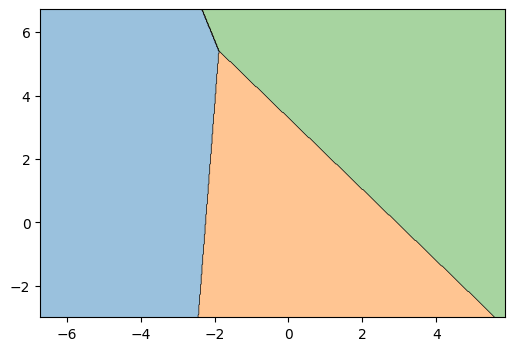

In [79]:
model = LogisticRegression(solver = 'lbfgs', multi_class= 'auto', max_iter = 1000)
model.fit(X,y)
plt.figure(figsize = (6,4))

plot_decision_regions(X,y, clf = model, legend = 2)
plt.xlabel('X1')
plt.ylabel('X2') 
plt.title('Decision Regions: ')
plt.show()

In [83]:
data = pd.read_csv('/content/Vehicle.csv', header=(0))
data = data.dropna(axis = 'rows')

data.head(10)

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


In [87]:
X = data[:, 0:-1]
y = data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


In [88]:
from sklearn import tree 

model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

score = accuracy_score(y_pred, y_test)
print('Acuracia: ',score)

Acuracia:  0.6322008862629247


In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(model.fit(x_train,y_train), filled = True)
plt.show()

In [ ]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 2)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

score = accuracy_score(y_pred, y_test)
print('Acuracia: ',score)

plt.figure(figsize=(10,6))
tree.plot_tree(model.fit(x_train, y_train), filled = True)

In [99]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, bootstrap = True,
                               class_weight = None,
                               max_depth = None,
                               criterion= 'gini',
                               max_features = 'sqrt',
                               max_leaf_nodes = None,
                               min_impurity_decrease = 0.0,
                               min_samples_leaf = 1, min_samples_split = 2,
                               min_weight_fraction_leaf = 0.0, n_jobs = 1,
                               oob_score = False, 
                               random_state = None, verbose = 0,
                               warm_start = False)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = accuracy_score(y_test,y_pred)
print("Acuracia",score)


Acuracia 0.6779911373707533


In [ ]:
vscore = []

vn = []

for n in range(1, 100, 10):
  model = RandomForestClassifier(n_estimators=n)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  score = accuracy_score(y_test,y_pred)
  print("Numero de estimadores: ",n, "Acuracia: ",score)

  vscore.append(score)
  vn.append(score)

best_n = vn[np.argmax(vscore)]
print("Melhor n: ",best_n,' com acuracia: ', vscore[np.argmax(vscore)])
plt.figure(figsize = (10,5))
plt.plot(vn,vscore, '-bo')
plt.xlabel('Numero de estimadores', fontsize = 15)
plt.ylabel('Acuracia', fontsize = 15)
plt.show()

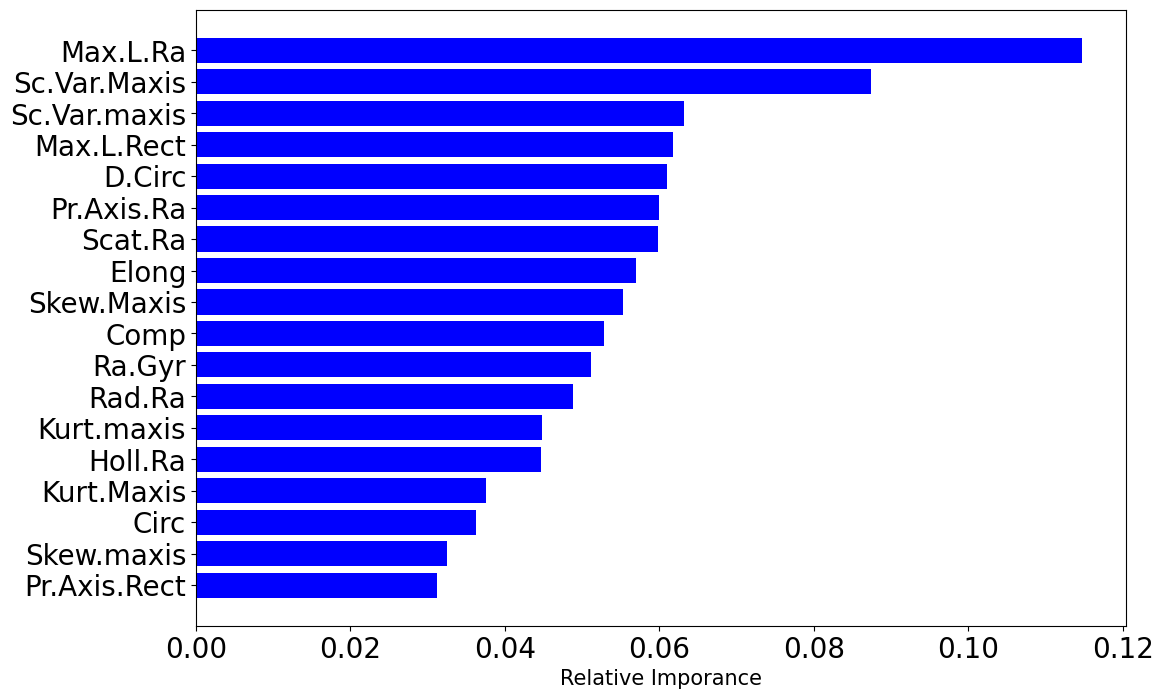

In [113]:
data = pd.read_csv('/content/Vehicle.csv', header = (0))
data = data.dropna(axis = 'rows')
features_names = data.columns 

data = data.to_numpy()

importances = model.feature_importances_
indices = np.argsort(importances)

lmeas_order = []

for i in indices:
  lmeas_order.append(features_names[i])

plt.figure(figsize=(12,8))

plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), lmeas_order, fontsize = 15)
plt.xlabel('Relative Imporance', fontsize = 15)
plt.xticks(color = 'k', size = 20)
plt.yticks(color = 'k', size = 20)
plt.show()